# Frågor

#### 1.  Vad är skillnaden mellan Regressionsproblem och Klassificieringsproblem?
- Regressionsproblem handlar om att förutse en numerisk output baserat på en eller flera inputs. Exempel på regressionsproblem kan vara att förutse huspriser baserat på egenskaper som antal rum, storlek på tomt och geografiskt läge. Däremot handlar Klassificeringsproblem om att tilldela en eller flera kategorier till en input. Exempel på klassificeringsproblem kan vara att identifiera om en e-post är skräppost eller inte baserat på dess innehåll eller att kunna klassificiera handskrivna siffror enligt intränade maskininlärningsmodeller.

#### 2. Vad är "supervised learning"? Kan du ge några exempel på modeller som används och potentiella tillämpningsområden?           
- Supervised Learning beskriver två typer av problem och det är de två vi nämnde i första frågan och det innebär att data som kommer användas har "etiketter" eller "lables". Modeller som används i supervised learning är k-Nearest Neighbors, Linear Regression, Logistic Regression, Support Vecor Machines, Decision Trees, Random Forest and Nutral networks. 
- Potentiella tillämpningsområden för supervised learning är bildklassificiering, Textanalys, Röstigenkänning, Medicinsk diagnos, Finansiell prognos. 

#### 3. Vad är RMSE?
- RMSE (root mean squared error)  är en vanlig utvarderings mått för modeller som används för att lösa regressionsproblem. RMSE mäter prediktionernas medelavsånd från de sanna, observerade värdena.

- Formeln:     $RMSE = \sqrt{\frac{1} {n} \sum_{i=1}^{n}(\hat{y}_i-y_i)^2}$

#### 4. Vad är en "Confusion Matrix"? 
- Confusion Matrix precis som RMSE är en utvarderings mått fast för klassificieringsmodeller. Den visar antalet korrekta och inkorrekta klassificeringar som modellen har gjort på en testuppsättning. Den är bra att avända vid obalancerade dataset när det inte kan hanteras med accuracy. 
- Denna matrisen har fyra celler 
- True Positive ( korrekt klassificierade positiva observationer) 
- False Positive (fel klassificierade positiva observationer)
- False Negative (fel klassificierade negativa observationer)
- True Negative (korrekt klassificierade negativa observationer)
- Från Confusion Matrix kan man bygga två nya mått för klassificieringsmodeller, precision och Recall från de två kan man definera en till som kallas för F1 score. 

# ____________________________________________
# Modellering av MNIST data

## Imports

In [1]:
import sklearn
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier


# Dataset
from sklearn.datasets import fetch_openml 



## Tar fram data

In [2]:
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
mnist.keys()
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

## Databeskrivning

In [3]:
# unpackar touple till X-matrix och y-1D array 
X = mnist["data"]
y = mnist["target"].astype(np.uint8) # Konverterar y från object till integer

In [4]:
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [5]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


(-0.5, 27.5, 27.5, -0.5)

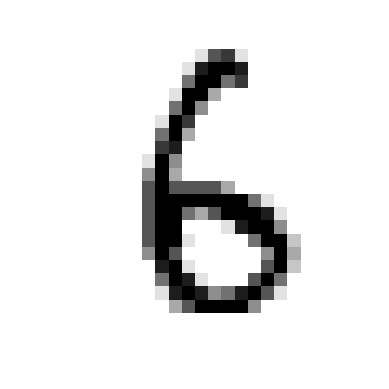

In [7]:
some_digit = X[63000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

In [8]:
# label 
y[63000]

6

In [2]:
X[63000]


### Skapar träningsdata och testdata

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


## --------------------------------------------------------------------------------------
#### Jag har modellerat lite med mindre data (inget viktigt, hoppa över) 

In [11]:
# # Tar mindre data för att snabba upp. 
# # SVMs are particularly well suited for classification of complex small- or medium-sized datasets thats why I take less data
# X_train = X[:5000]
# y_train = y[:5000]
# X_test = X[5000:6000]
# y_test = y[5000:6000]


# scaler = StandardScaler()

# X_train_scaled = scaler.fit_transform(X_train) 
# X_test_scaled = scaler.transform(X_test)  




In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(52500, 784)
(52500,)
(17500, 784)
(17500,)


### Skalar datan


In [13]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [14]:
X_test_scaled.mean()

-0.0012178504754349422

In [15]:
# Varför får jag inte mean = 0 ?
# print(X_train_scaled.mean())
# svar 9.733710436305455e-19
# Svaret på frågan: Denna siffran är jätte liten och den är nära 0 


### Dimensionreducering
PCA
PCA reduces the dimension of data by projecting it down to a lower dimensional space. PCA chooses the axes that contains the largest amount of variance in the training set. This is intuitvely clear since you generally do not want to loose information.


#### PCA


In [16]:
# n_components står för 95% variance
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [17]:
# principal components (dimensioner)
# Det var minsta antal dimensioner vi behöver för att behålla 95% variance 
pca.n_components_

154

In [18]:
# pca.explained_variance_ratio_
# X_train_reduced
# X_train

In [19]:
# Varians är 95%
np.sum(pca.explained_variance_ratio_)

0.9504260395871056

In [20]:
# Skalar datan 
X_tr_red_sc = scaler.fit_transform(X_train_reduced)
X_te_red_sc = scaler.transform(X_test_reduced)

# ____________________________________________________

# Support Vector Machine  

### RandomizedSearch (mindre data)

In [21]:
# svm_clf = SVC()

In [22]:
# # Båda hyperparametrar gamma och C vi justering gör modellen mer flexibel  

# hyper_param_distribution = {"gamma": reciprocal(0.001, 0.2), "C": uniform(1, 10)}

# rs_svm_clf = RandomizedSearchCV(svm_clf, hyper_param_distribution, n_iter=10, verbose=2, cv=3)
# rs_svm_clf.fit(X_train_scaled, y_train)

In [23]:
# # Accuracy 
# print("")
# print("Best Hyperparams:", rs_svm_clf.best_params_)
# print("Best Score: ", rs_svm_clf.best_score_)

# y_pred_rnd = rs_svm_clf.predict(X_test_scaled)
# accuracy_score(y_test, y_pred_rnd)
# # accuracy 0.927

In [24]:
# Confusion Matrix

# cm = confusion_matrix(y_test, y_pred_rnd)
# ConfusionMatrixDisplay(cm).plot()

# -------------------------------------------------------------------------------


## ________________________________________________________________
## GridSearchCV 


In [25]:
svm_clf = SVC()

In [26]:
# hyper_par_svc = [
#     {'kernel': ['poly',"rbf"], 'gamma': (3,5.544374877911318), 'C': (0.1, 0.002288944265350039)}
# ]

# gs_svc = GridSearchCV(svm_clf, hyper_par_svc, cv = 2, verbose=2)


# # Fittar modellen 
# gs_svc.fit(X_train, y_train)

In [27]:
# # Info enligt Gridsearch 

# print("")
# print("Best Hyperparams:", gs_svc.best_params_)
# print("Best Score: ", gs_svc.best_score_)

# y_pred_grid = gs_svc.predict(X_test)
# print("Accuracy:", accuracy_score(y_test, y_pred_grid))



<!-- #### Hela datasetet, Reducerad dimension med bästa hyperparametrarna -->

### Hela datasetet, Reducerad dimension, bätre justerade hyperparametrar

In [28]:
# hyper_par_svc = [
#     {'kernel': ['poly'], 'gamma': [1, 3], 'C': [0.01, 0.1]}
# ]

# gs_svc = GridSearchCV(svm_clf, hyper_par_svc, cv = 2, verbose=2)


# # Fittar modellen 
# gs_svc.fit(X_tr_red_sc, y_train)

#### Accuracy

In [29]:
# # Info enligt Gridsearch 

# print("")
# print("Best Hyperparams:", gs_svc.best_params_)
# print("Best Score: ", gs_svc.best_score_)

# y_pred_grid = gs_svc.predict(X_te_red_sc)
# print("Accuracy:", accuracy_score(y_test, y_pred_grid))

#### Confusion matrix

In [30]:
# cm = confusion_matrix(y_test, y_pred_grid)
# ConfusionMatrixDisplay(cm).plot()

### Hela datasetet, EJ Reducerad dimension, bätre justerade  hyperparametrar


In [31]:
hyper_par_svc = [
    {'kernel': ['poly'], 'gamma': [0.5, 1], 'C': [0.001, 0.01, ]}
]

gs_svc = GridSearchCV(svm_clf, hyper_par_svc, cv = 2, verbose=2)


# Fittar modellen 
gs_svc.fit(X_train_scaled, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] END ....................C=0.001, gamma=0.5, kernel=poly; total time= 3.3min
[CV] END ....................C=0.001, gamma=0.5, kernel=poly; total time= 3.9min
[CV] END ......................C=0.001, gamma=1, kernel=poly; total time= 3.3min
[CV] END ......................C=0.001, gamma=1, kernel=poly; total time= 3.3min
[CV] END .....................C=0.01, gamma=0.5, kernel=poly; total time= 3.3min
[CV] END .....................C=0.01, gamma=0.5, kernel=poly; total time= 3.3min
[CV] END .......................C=0.01, gamma=1, kernel=poly; total time= 3.2min
[CV] END .......................C=0.01, gamma=1, kernel=poly; total time= 3.3min


GridSearchCV(cv=2, estimator=SVC(),
             param_grid=[{'C': [0.001, 0.01], 'gamma': [0.5, 1],
                          'kernel': ['poly']}],
             verbose=2)

#### Accuracy

In [33]:
# Info enligt Gridsearch 
print("")
print("Best Hyperparams:", gs_svc.best_params_)
print("Best Score: ", gs_svc.best_score_)

y_pred_grid = gs_svc.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred_grid))


Best Hyperparams: {'C': 0.001, 'gamma': 0.5, 'kernel': 'poly'}
Best Score:  0.9720380952380953
Accuracy: 0.9790285714285715


#### Confusion matrix

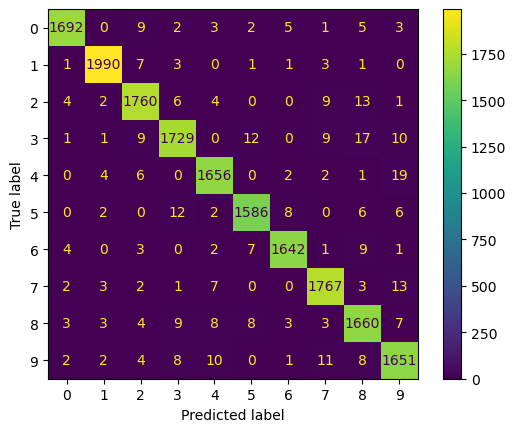

In [34]:
cm = confusion_matrix(y_test, y_pred_grid)
ConfusionMatrixDisplay(cm).plot()   

#### Efter 10 timmar (all data, utan reducerad dimesion) 
hyper_param_grid = 
[{'kernel': ['rbf', 'poly'], 'gamma': [0, 1, 2], 'C': [0.5, 1, 1.5]}]

gs_svc = GridSearchCV(svm_clf, hyper_param_grid, cv = 2, verbose=2)

Fittar modellen 
gs_svc.fit(X_train_scaled, y_train)

- Best Hyperparams: {'C': 0.5, 'gamma': 1, 'kernel': 'poly'}
- Best Score:  0.9717142857142858
- Accuracy: 0.9794285714285714

# ______________________________________________________

# Logistisk regression 




### Skapar modellen - testar olika parametrar själv


In [35]:
# Initierar modellen

# log_reg = LogisticRegression(solver="lbfgs", random_state=42, max_iter=1000)# Accuracy: 0.892
# log_reg = LogisticRegression(solver="liblinear", penalty="l1", random_state=42, max_iter=100) Accuracy: 0.892
# log_reg = LogisticRegression(solver="lbfgs", C=2.0, max_iter=1000) Accuracy: 0.887 (C does no difference)
log_reg = LogisticRegression(solver="lbfgs",random_state=42, max_iter=1000) # Accuracy: 0.89 (tol does no difference)

In [36]:
# fittar modellen
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [37]:
# Predikterar och värderar modellen 
y_pred = log_reg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9116571428571428


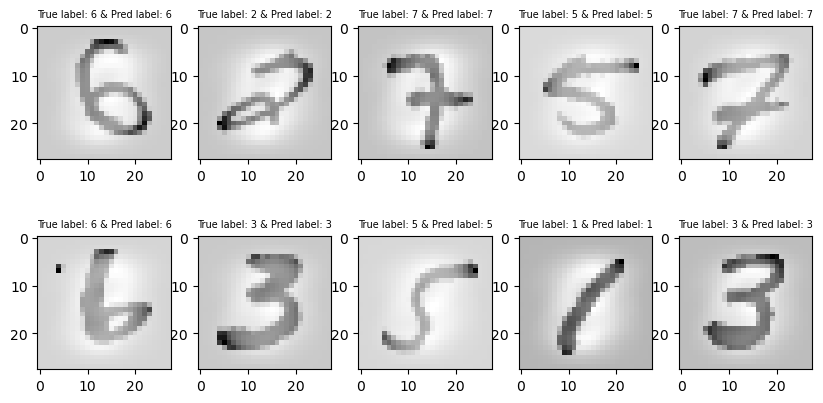

In [38]:
# Plottar datan 
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test_scaled[i].reshape(28, 28), cmap='binary', interpolation='nearest')
    ax.set(title = f"True label: {y_test[i]} & Pred label: {log_reg.predict([X_test_scaled[i]])[0]}")
    ax.title.set_fontsize(7)
plt.show()

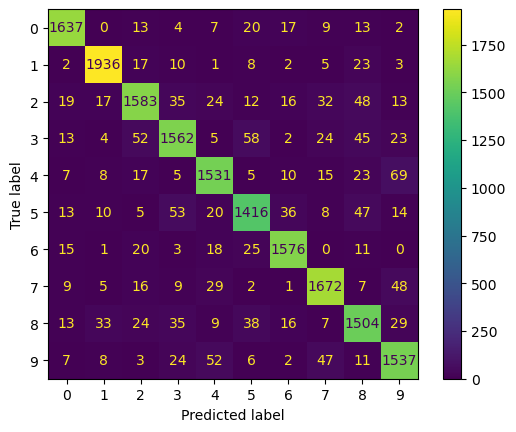

In [39]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

#### 30 fits failade för att inte alla hyperparametrar passar/kompatibla med varandra(kolla up på sklearn) 

In [40]:
# Tränar modellen på skalad data med reducerad dimension 
# X_tr_red_sc 
# X_te_red_sc 

# Dessa parametrar kan jag förklara
# Initierar modellen igen 
log_reg = LogisticRegression(random_state=42, max_iter=1000)
hy_par = [
    {'penalty': ['None','l1', 'l2' ], 'solver': ['lbfgs', 'liblinear']}
]

# Initierar GridSearch
gs_lr = GridSearchCV(log_reg, hy_par, cv = 3, verbose=2)

# Fittar modellen 
gs_lr.fit(X_tr_red_sc, y_train)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END .........................penalty=None, solver=lbfgs; total time=   0.0s
[CV] END .........................penalty=None, solver=lbfgs; total time=   0.0s
[CV] END .........................penalty=None, solver=lbfgs; total time=   0.0s
[CV] END .....................penalty=None, solver=liblinear; total time=   0.0s
[CV] END .....................penalty=None, solver=liblinear; total time=   0.0s
[CV] END .....................penalty=None, solver=liblinear; total time=   0.0s
[CV] END ...........................penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...........................penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...........................penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......................penalty=l1, solver=liblinear; total time=  54.0s
[CV] END .......................penalty=l1, solver=liblinear; total time=  48.4s
[CV] END .......................penalty=l1, solve

C:\Users\mreic\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
9 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mreic\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mreic\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\mreic\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 441, in _check_solver
    raise ValueError(
ValueE

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid=[{'penalty': ['None', 'l1', 'l2'],
                          'solver': ['lbfgs', 'liblinear']}],
             verbose=2)

In [41]:
# Resultatet enligt Gridseacrch
print("")
print("Best Hyperparameters: ", gs_lr.best_params_)
print("Best Score: ", gs_lr.best_score_)

# Utvarderings mått
y_pred_lr = gs_lr.predict(X_te_red_sc)
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)


Best Hyperparameters:  {'penalty': 'l2', 'solver': 'lbfgs'}
Best Score:  0.9179428571428572
Accuracy: 0.9189142857142857



### GridSearch  




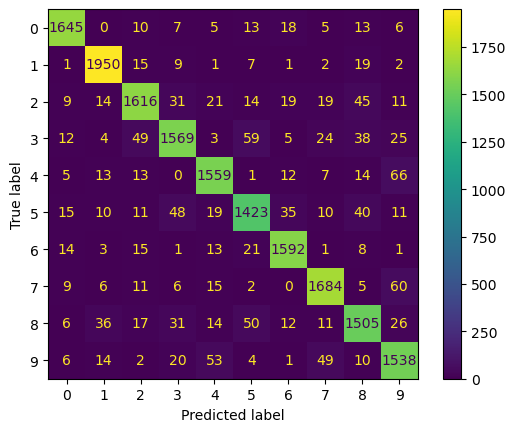

In [42]:
cm = confusion_matrix(y_test, y_pred_lr)
ConfusionMatrixDisplay(cm).plot()

#### Datan jag fick bättre score med var (X_train_scaled, y_train) skalad train set.
- Best Hyperparameters:  {'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001}
- Best Score:  0.9192380952380952
- Accuracy: 0.9215428571428571

# ___________________________________________________
# Random Forest

### ? Bagging and Pasting (Behövs ej)
- Denna ingår i Random Forest Classifier och det har effektivare implementation

- In general, we use bagging and pasting when we have a high variance model, which tends to overfit the training data, and we want to improve its accuracy and generalization performance. Bagging and pasting can also be used with different base models, such as decision trees or SVMs, and can be combined with other ensemble methods, such as boosting or stacking, to further improve the model's performance.

### GridSearch
- Random forest models have several hyperparameters that can impact the performance of the model, such as the number of trees in the forest, the maximum depth of the trees, the minimum number of samples required to split an internal node, and the number of features to consider when looking for the best split. It is important to tune these hyperparameters using techniques such as grid search or random search to obtain the best performance of the model.


In [43]:
# Max_leaf_nodes = None
# Initierar Random Forest modellen 
random_forest = RandomForestClassifier(random_state=42)
hyper_param_grid_rf = [{'n_estimators': [500], 'max_depth':[None, 10, 20],'min_samples_split': [2, 5, 10] }]

# Initierar GridSearch, stoppar in hyperparametrar
gs_rf = GridSearchCV(random_forest, hyper_param_grid_rf, cv=3, verbose=2)

# Fittar modellen 
gs_rf.fit(X_train_reduced, y_train)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=500; total time= 4.0min
[CV] END max_depth=None, min_samples_split=2, n_estimators=500; total time= 4.0min
[CV] END max_depth=None, min_samples_split=2, n_estimators=500; total time= 4.0min
[CV] END max_depth=None, min_samples_split=5, n_estimators=500; total time= 4.0min
[CV] END max_depth=None, min_samples_split=5, n_estimators=500; total time= 4.0min
[CV] END max_depth=None, min_samples_split=5, n_estimators=500; total time= 4.0min
[CV] END max_depth=None, min_samples_split=10, n_estimators=500; total time= 3.9min
[CV] END max_depth=None, min_samples_split=10, n_estimators=500; total time= 3.9min
[CV] END max_depth=None, min_samples_split=10, n_estimators=500; total time= 3.9min
[CV] END max_depth=10, min_samples_split=2, n_estimators=500; total time= 2.7min
[CV] END max_depth=10, min_samples_split=2, n_estimators=500; total time= 2.7min
[CV] END max_depth=10, min_s

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_depth': [None, 10, 20],
                          'min_samples_split': [2, 5, 10],
                          'n_estimators': [500]}],
             verbose=2)

In [44]:
# Resultatet enligt Gridseacrch
print("")
print("Best Hyperparameters: ", gs_rf.best_params_)
print("Best Score: ", gs_rf.best_score_)

# Utvarderings mått
y_pred_rf = gs_rf.predict(X_test_reduced)
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)


Best Hyperparameters:  {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 500}
Best Score:  0.9469333333333334
Accuracy: 0.9501714285714286


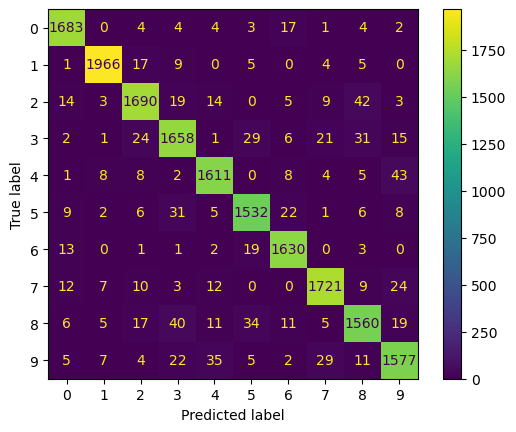

In [45]:
cm = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm).plot()

### Första dataset jag tränade modellen med (X_train, y_train) var inte skalad eller med reducerade dimensioner.   

- Best Hyperparameters:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}
- Best Score:  0.9469333333333334
- Accuracy: 0.9530857142857143